# The Search for New Earths

The data describe the change in flux (light intensity) of several thousand stars. Each star has a binary label of `2` or `1`. 2 indicated that that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems.

As you can imagine, planets themselves do not emit light, but the stars that they orbit do. If said star is watched over several months or years, there may be a regular 'dimming' of the flux (the light intensity). This is evidence that there may be an orbiting body around the star; such a star could be considered to be a 'candidate' system. Further study of our candidate system, for example by a satellite that captures light at a different wavelength, could solidify the belief that the candidate can in fact be 'confirmed'.

## Import

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline  

## Read

In [2]:
df = pd.read_csv('../input/exoTrain.csv')
test = pd.read_csv('../input/exoTest.csv')

df.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


## Show sample

<AxesSubplot:>

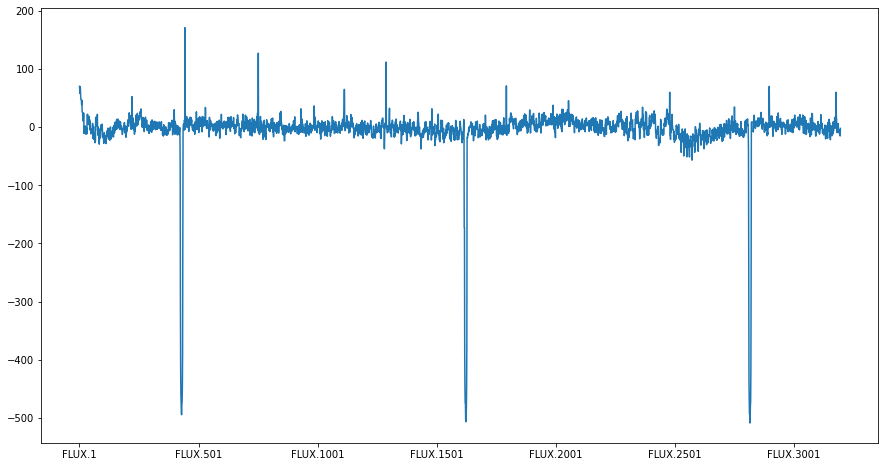

In [3]:
df.iloc[12, 1:].plot(figsize=(15,8))

## daco

In [4]:
x_train = df.loc[:, df.columns != 'LABEL'].to_numpy()
y_train = df.loc[:, df.columns == 'LABEL'].to_numpy()
x_test = test.loc[:, test.columns != 'LABEL'].to_numpy()
y_test = test.loc[:, test.columns == 'LABEL'].to_numpy()

## Build model

In [26]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(x_train.shape[1], activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(3)
])
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


## Train

In [27]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
159/159 [==============================] - 1s 7ms/step - loss: 591.1318 - accuracy: 0.9672
Epoch 2/5
159/159 [==============================] - 1s 7ms/step - loss: 248.9413 - accuracy: 0.9707
Epoch 3/5
159/159 [==============================] - 1s 7ms/step - loss: 1551.6187 - accuracy: 0.9910
Epoch 4/5
159/159 [==============================] - 1s 7ms/step - loss: 354.9362 - accuracy: 0.9729
Epoch 5/5
159/159 [==============================] - 1s 7ms/step - loss: 269.8937 - accuracy: 0.9866


## Evaluate the model

In [28]:
model.evaluate(x_test,  y_test, verbose=1)

18/18 [==============================] - 0s 2ms/step - loss: 1106.5543 - accuracy: 0.9930


[1106.5543212890625, 0.9929824471473694]